**Importing packages**

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk

**Loading DataSet**

In [38]:
df = pd.read_csv("indian-national-level-election.csv")
df


,st_name,year,pc_no,pc_name,pc_type,cand_name,cand_sex,partyname,partyabbre,totvotpoll,electors
0,Andaman & Nicobar Islands,1977,1,Andaman & Nicobar Islands,GEN,K.R. Ganesh,M,Independents,IND,25168,85308
1,Andaman & Nicobar Islands,1977,1,Andaman & Nicobar Islands,GEN,Manoranjan Bhakta,M,Indian National Congress,INC,35400,85308
2,Andaman & Nicobar Islands,1980,1,Andaman & Nicobar Islands,GEN,Ramesh Mazumdar,M,Independents,IND,109,96084
3,Andaman & Nicobar Islands,1980,1,Andaman & Nicobar Islands,GEN,Alagiri Swamy,M,Independents,IND,125,96084
4,Andaman & Nicobar Islands,1980,1,Andaman & Nicobar Islands,GEN,Kannu Chemy,M,Independents,IND,405,96084
...,...,...,...,...,...,...,...,...,...,...,...
73076,West Bengal,2014,42,Birbhum,GEN,None Of The Above,NaN,NOTA,NOTA,14557,1495089
73077,West Bengal,2014,42,Birbhum,GEN,Syed Siraj Jimmi,M,INC,INC,132084,1495089
73078,West Bengal,2014,42,Birbhum,GEN,Joy Banerjee,M,BJP,BJP,235753,1495089
73079,West Bengal,2014,42,Birbhum,GEN,Dr. Elahi Kamre Mahammad,M,CPM,CPM,393305,1495089


**Pre Processing the Dataset**

In [39]:
df.shape

(73081, 11)

In [40]:
df.describe()

,year,pc_no,totvotpoll,electors
count,73081.000000,73081.000000,73081.000000,7.308100e+04
mean,1996.779505,22.311490,49834.760266,1.122277e+06
std,10.432527,19.039793,104893.319706,3.560049e+05
min,1977.000000,1.000000,0.000000,1.947100e+04
25%,1989.000000,7.000000,872.000000,9.129850e+05
50%,1996.000000,18.000000,2743.000000,1.099503e+06
75%,2004.000000,33.000000,19185.000000,1.329086e+06
max,2014.000000,85.000000,863358.000000,3.368399e+06


In [41]:
df.dtypes

st_name       object
year           int64
pc_no          int64
pc_name       object
pc_type       object
cand_name     object
cand_sex      object
partyname     object
partyabbre    object
totvotpoll     int64
electors       int64
dtype: object

In [42]:
df.isna().sum()

st_name          0
year             0
pc_no            0
pc_name          0
pc_type       8070
cand_name        0
cand_sex       542
partyname        0
partyabbre       0
totvotpoll       0
electors         0
dtype: int64

In [43]:
df['pc_type'].fillna(method='ffill',inplace=True)

In [45]:
sex_mode = df.cand_sex.mode()[0]
df['cand_sex'].fillna(sex_mode,inplace=True)

In [46]:
df.isnull().sum()

st_name       0
year          0
pc_no         0
pc_name       0
pc_type       0
cand_name     0
cand_sex      0
partyname     0
partyabbre    0
totvotpoll    0
electors      0
dtype: int64

In [47]:
df.columns

Index(['st_name', 'year', 'pc_no', 'pc_name', 'pc_type', 'cand_name',
       'cand_sex', 'partyname', 'partyabbre', 'totvotpoll', 'electors'],
      dtype='object')

In [48]:
df.st_name.value_counts()

Uttar Pradesh                          14791
Bihar                                   7727
Maharashtra                             6458
Tamil Nadu                              5309
Andhra Pradesh                          5236
Madhya Pradesh                          5196
West Bengal                             3648
Karnataka                               3624
Rajasthan                               3433
Gujarat                                 2946
Haryana                                 2066
Kerala                                  1881
National Capital Territory Of Delhi     1823
Punjab                                  1715
Orissa                                  1354
Assam                                   1123
Jammu & Kashmir                          695
Jharkhand                                685
Himachal Pradesh                         347
Chhattisgarh                             324
Nct Of Delhi                             317
Chandigarh                               295
Odisha    

**Top 5 parties that got most votes in Karnataka**

In [49]:
data_2014 = df[df['year'] == 2014]
up_data_2014 = data_2014[data_2014['st_name'] =='Karnataka']
up_data_2014_max_voted_party = up_data_2014.groupby('partyabbre')['totvotpoll'].sum()
up_data_2014_max_voted_party = pd.DataFrame(up_data_2014_max_voted_party)
up_data_2014_max_voted_party = up_data_2014_max_voted_party.sort_values(by= 'totvotpoll',ascending=False)
up_data_2014_top5_max_voted_party = up_data_2014_max_voted_party.head(5)
up_data_2014_top5_max_voted_party = up_data_2014_top5_max_voted_party.reset_index()
up_data_2014_top5_max_voted_party

,partyabbre,totvotpoll
0,BJP,13350285
1,INC,12666530
2,JD(S),3406465
3,IND,483513
4,BSP,265006


**Visualizing those top 5 parties**

<BarContainer object of 5 artists>

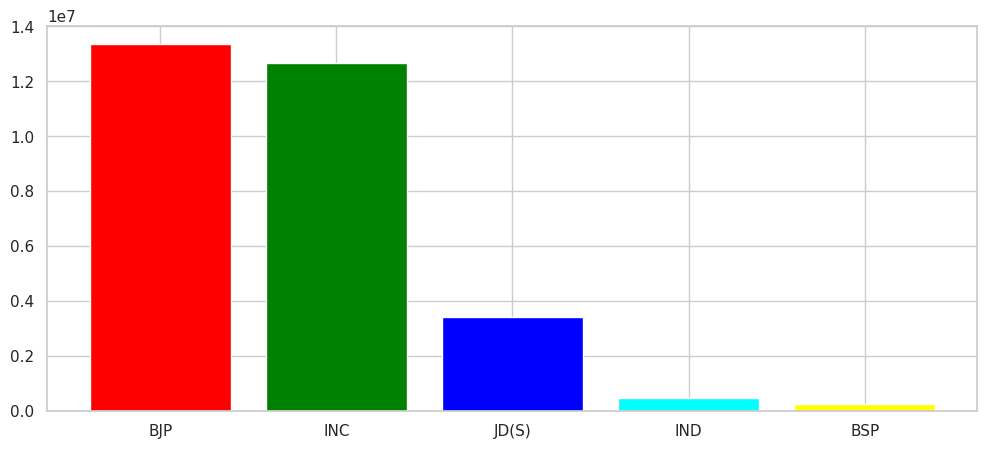

In [50]:
plt.figure(figsize = (12,5))
plt.bar(up_data_2014_top5_max_voted_party['partyabbre'],up_data_2014_top5_max_voted_party['totvotpoll'], color=[ 'red', 'green', 'blue', 'cyan', 'yellow'])

**Plotting the total votes corresponding to each party(top 8) for each year**

In [51]:
yearwise_partywise_total_votes = df.groupby(['year','partyabbre'])['totvotpoll'].sum()
yearwise_partywise_total_votes = pd.DataFrame(yearwise_partywise_total_votes).reset_index()
years = yearwise_partywise_total_votes['year'].unique()
yearwise_partywise_total_votes_again = {}
for year in list(years):
    yearwise_partywise_total_votes_again['year_' + f'{year}'] = yearwise_partywise_total_votes[yearwise_partywise_total_votes['year'] == year].sort_values(by = 'totvotpoll',ascending= False).head(8)

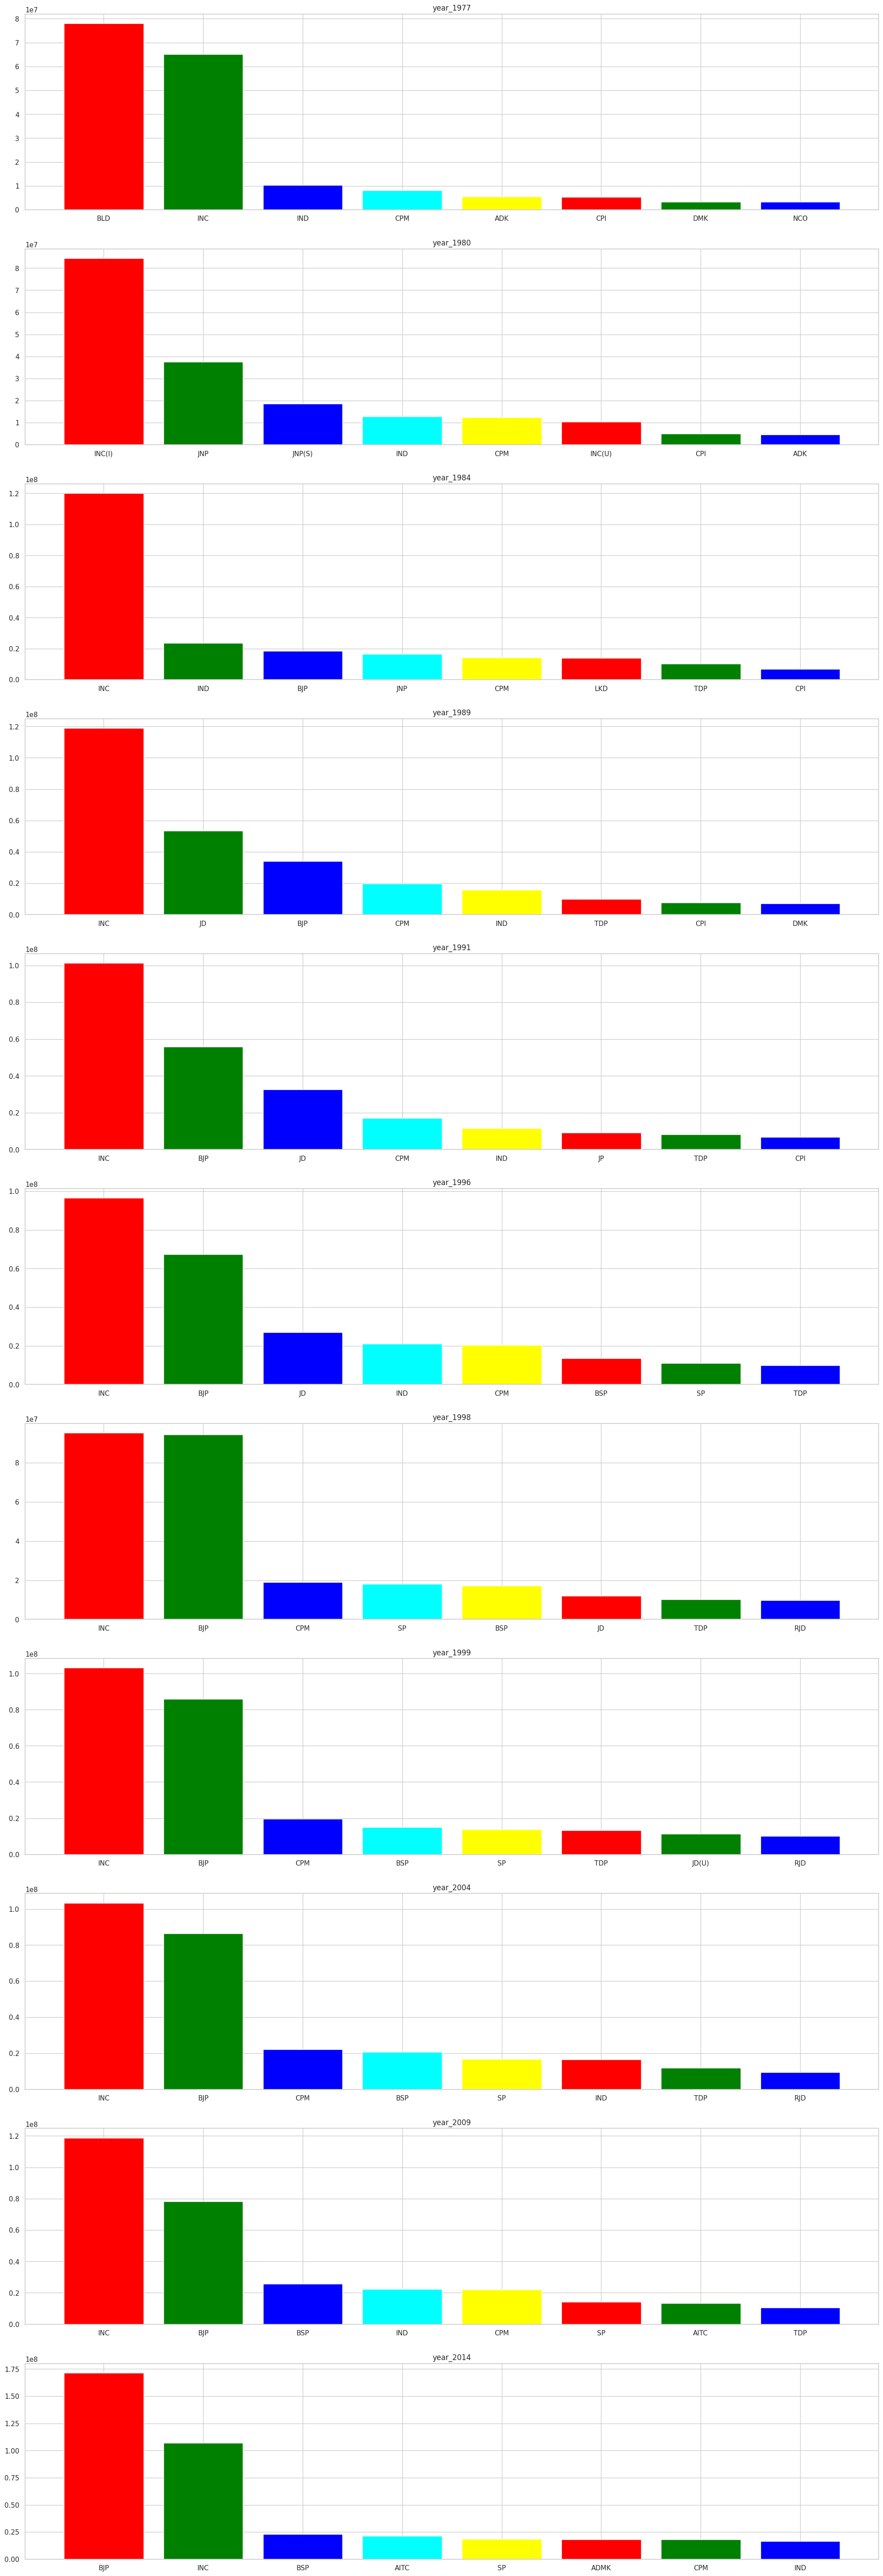

In [52]:
plt.rcParams.update({'font.size': 22})
plt.figure(figsize = (25,75))
for index,(key,value)  in enumerate(yearwise_partywise_total_votes_again.items()):
    dataframe = yearwise_partywise_total_votes_again[key]
    plt.subplot(11, 1, index+1)
    plt.bar(dataframe['partyabbre'],dataframe['totvotpoll'],color=[ 'red', 'green', 'blue', 'cyan', 'yellow'])
    plt.title(key)

**Male and Female Count**

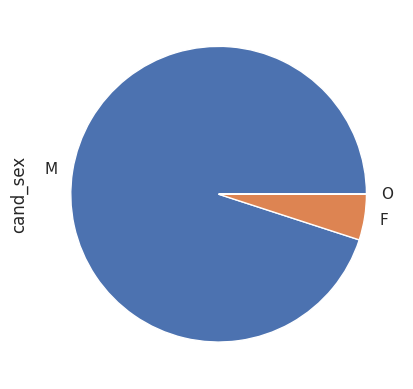

In [53]:
df.cand_sex.value_counts(normalize=True).plot.pie()
plt.show()

**Parliamentary constituency reservation status**

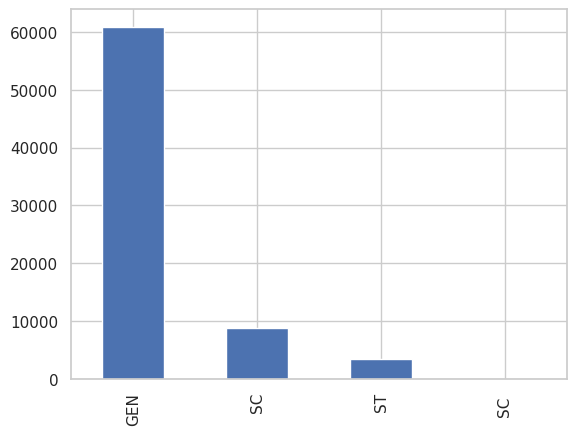

In [54]:
df.pc_type.value_counts().plot.bar()
plt.show()

In [64]:
df.groupby('cand_sex')['year'].value_counts()

cand_sex  year
F         2014      531
          1996      459
          2009      441
          2004      298
          1991      255
          1999      232
          1998      227
          1989      171
          1984      131
          1980      100
          1977       50
M         1996    10322
          2014     6487
          1991     6383
          2009     5989
          1989     4932
          2004     4107
          1984     4003
          1998     3502
          1999     3461
          1980     3414
          1977     1698
O         2014        6
Name: year, dtype: int64

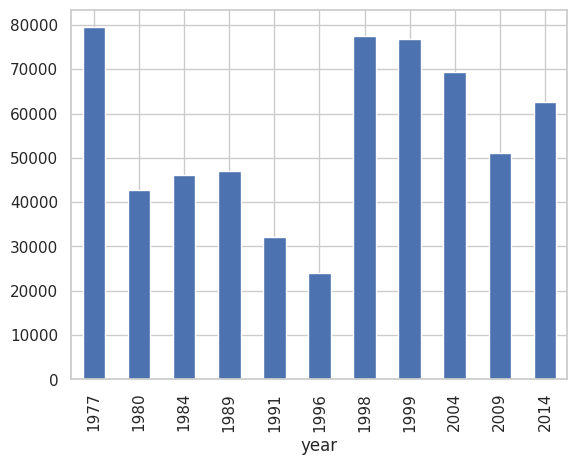

In [65]:
df.groupby('year')['totvotpoll'].mean().plot.bar()
plt.show()

In [59]:
inc_data = df[df['partyname'] == 'Indian National Congress']
bjp_data = df[df['partyname'] == 'BJP']

In [60]:
inc_data

,st_name,year,pc_no,pc_name,pc_type,cand_name,cand_sex,partyname,partyabbre,totvotpoll,electors
15885,Gujarat,1984,2,Surendranagar,GEN,Jhala Digivijaysinhji Pratapsinhji,M,Indian National Congress,INC,191632,656235
15892,Gujarat,1984,3,Jamnagar,GEN,Jadeja Daulatsinh Partap Sinh,M,Indian National Congress,INC,177317,639311
15903,Gujarat,1984,4,Rajkot,GEN,Mavani Ramaben Ramjibhai,F,Indian National Congress,INC,225360,827629
15912,Gujarat,1984,5,Porbandar,GEN,Odedara Bharatbhai Maldevji,M,Indian National Congress,INC,205262,681087
15918,Gujarat,1984,6,Junagadh,GEN,Patel Mohanbhai Laljibhai,M,Indian National Congress,INC,188441,693720
...,...,...,...,...,...,...,...,...,...,...,...
72487,West Bengal,2009,33,Jhargram,SC,Amrit Hansda,M,Indian National Congress,INC,252886,1241580
72511,West Bengal,2009,35,Purulia,SC,Shantiram Mahato,M,Indian National Congress,INC,379900,1257799
72522,West Bengal,2009,36,Bankura,SC,Subrata Mukherjee,M,Indian National Congress,INC,361421,1268611
72544,West Bengal,2009,39,Burdwan - Durgapur,SC,Nargis Begum,F,Indian National Congress,INC,465162,1353380


**Getting insights from Indian National Congress Party data specifically**

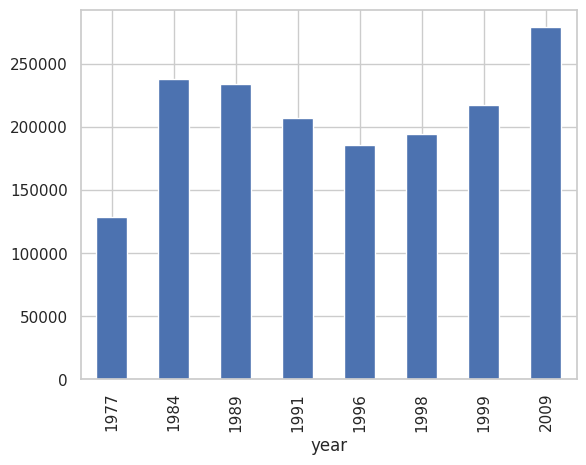

In [74]:
inc_data.groupby('year')['totvotpoll'].mean().plot.bar()
plt.show()

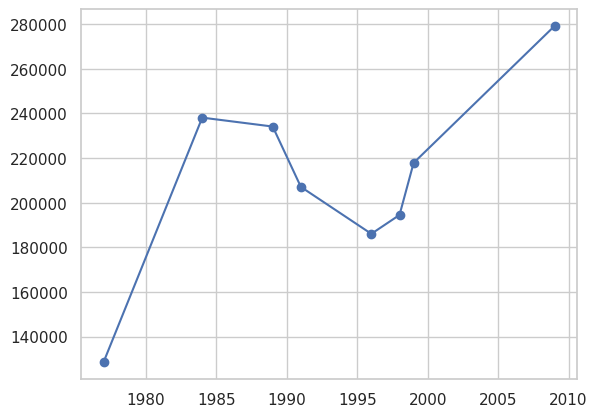

In [76]:
plt.plot(inc_data.groupby('year')['totvotpoll'].mean(), marker='o', linestyle='-', color='b', label='Line Graph')
plt.show()

**plotting the Parliamentary constituency reservation status of the INC party specifically**

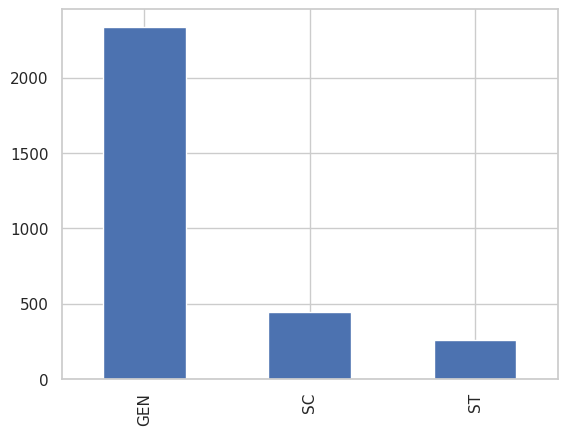

In [68]:
inc_data.pc_type.value_counts().plot.bar()
plt.show()

In [61]:
bjp_data

,st_name,year,pc_no,pc_name,pc_type,cand_name,cand_sex,partyname,partyabbre,totvotpoll,electors
17658,Gujarat,2004,1,Kutch,GEN,Gadhavi Pushpadan Shambhudan,M,BJP,BJP,221057,1006563
17667,Gujarat,2004,2,Surendranagar,GEN,Koli Patel Somabhai Gandabhai,M,BJP,BJP,219872,1109656
17676,Gujarat,2004,3,Jamnagar,GEN,Koradia Chandreshbhai Valjibhai (Chandresh Patel),M,BJP,BJP,198875,1072175
17682,Gujarat,2004,4,Rajkot,GEN,Dr. Kathiria Vallabhbhai Ramjibhai,M,BJP,BJP,320604,1650135
17689,Gujarat,2004,5,Porbandar,GEN,Patel Harilal Madhavjibhai (Haribhai Patel),M,BJP,BJP,229113,995027
...,...,...,...,...,...,...,...,...,...,...,...
73034,West Bengal,2014,38,Bardhaman Purba,SC,Santosh Roy,M,BJP,BJP,170828,1532244
73043,West Bengal,2014,39,Burdwan - Durgapur,GEN,Debasree Chaudhuri,F,BJP,BJP,237205,1583495
73060,West Bengal,2014,40,Asansol,GEN,Babul Supriya Baral (Babul Supriyo),M,BJP,BJP,419983,1469684
73066,West Bengal,2014,41,Bolpur,SC,Kamini Mohan Sarkar,M,BJP,BJP,197474,1538421


**Getting insights from BJP Party data specifically**

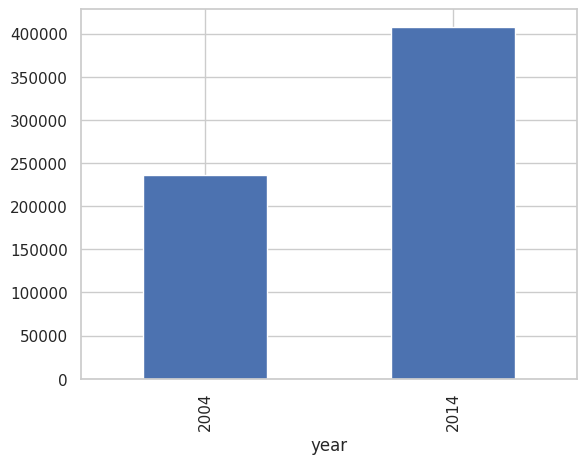

In [67]:
bjp_data.groupby('year')['totvotpoll'].mean().plot.bar()
plt.show()

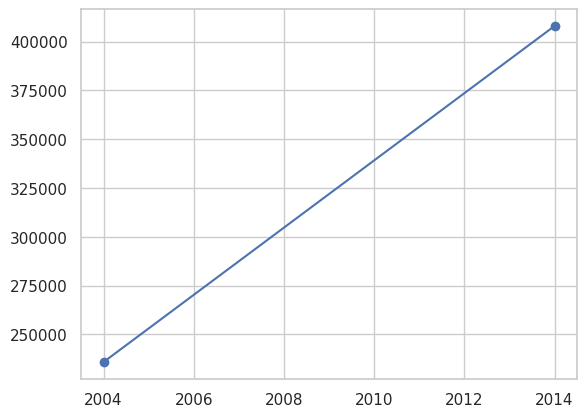

In [77]:
plt.plot(bjp_data.groupby('year')['totvotpoll'].mean(), marker='o', linestyle='-', color='b', label='Line Graph')
plt.show()

**plotting the Parliamentary constituency reservation status of the INC party specifically**

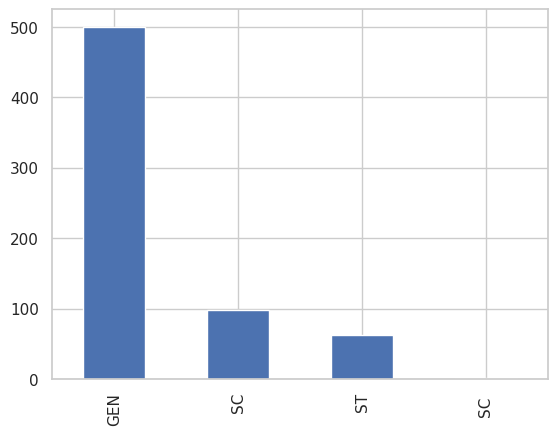

In [69]:
bjp_data.pc_type.value_counts().plot.bar()
plt.show()